## 载入数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [3]:
target_url = ("https://archive.ics.uci.edu/ml/machine-"
              "learning-databases/glass/glass.data")

In [5]:
columns_mapping = {
    'ID': 'ID',
    'RI': '折射率',
    'Na': '钠',
    'Mg': '镁',
    'Al': '铝',
    'Si': '硅',
    'K': '钾',
    'Ca': '钙',
    'Ba': '钡',
    'Fe': '铁',
    'Type': '类型',
}

try:
    df_glass = pd.read_csv("../../data/glass.csv", header=0)
except Exception as e:
    print(e)
    df_glass = pd.read_csv(target_url, header=None, prefix="V")
    df_glass.columns = columns_mapping.keys()
    df_glass.to_csv("../../data/glass.csv", index=False)

df_glass.head()

ID       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [6]:
nrows, ncols = df_glass.shape
print("Number of Rows: ", nrows)
print("Number of Cols: ", ncols)

Number of Rows:  214
Number of Cols:  11


## 绘制平行坐标图

In [8]:
max_type = np.max(df_glass['Type'])
max_type

7

In [15]:
df_glass_normalized = df_glass.copy()
# 只需要把属性值标准化即可
df_glass_normalized.iloc[:, 1:-1] = (df_glass_normalized.iloc[:, 1:-1] - df_glass_normalized.iloc[:, 1:-1].mean(axis=0))/df_glass_normalized.iloc[:, 1:-1].std(axis=0)

In [14]:
df_glass_normalized.head()

ID        RI        Na        Mg        Al        Si         K        Ca  \
0   1  0.870826  0.284287  1.251704 -0.690822 -1.124446 -0.670134 -0.145425   
1   2 -0.248750  0.590433  0.634680 -0.170061  0.102080 -0.026152 -0.791877   
2   3 -0.719631  0.149582  0.600016  0.190465  0.437760 -0.164148 -0.827010   
3   4 -0.232286 -0.242285  0.697076 -0.310266 -0.052850  0.111844 -0.517838   
4   5 -0.311315 -0.168810  0.648546 -0.410413  0.553957  0.081178 -0.623237   

         Ba        Fe  Type  
0 -0.352051 -0.585079     1  
1 -0.352051 -0.585079     1  
2 -0.352051 -0.585079     1  
3 -0.352051 -0.585079     1  
4 -0.352051 -0.585079     1

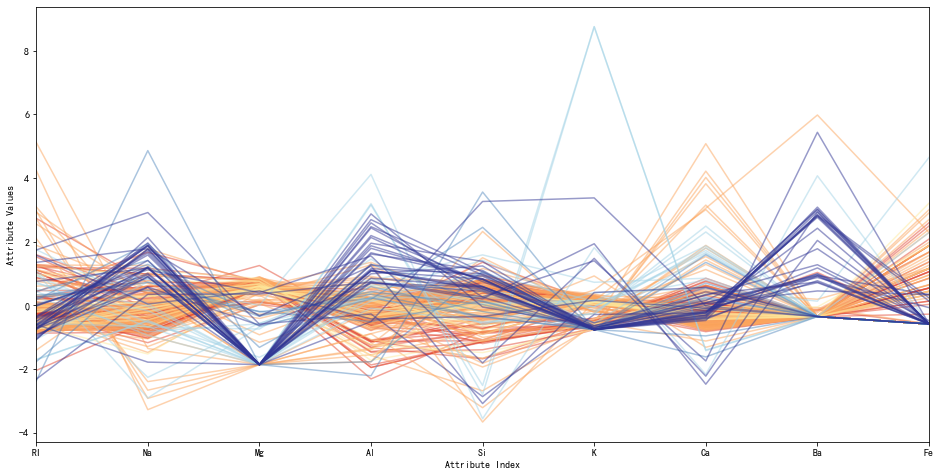

In [21]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)

for i in range(df_glass_normalized.shape[0]):
    data_row = df_glass_normalized.iloc[i, 1:-1]
    label_color = df_glass_normalized.iloc[i, -1]/max_type
    data_row.plot(color=plt.cm.RdYlBu(label_color), alpha=0.5, ax=ax)

plt.xlabel("Attribute Index")
plt.ylabel(("Attribute Values"))
plt.show()

每种颜色代表了一个类别。可以看到深蓝色的线在某些属性上，经常处于数据的边缘，也就是说，是这些属性上的异常点。